In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sdr

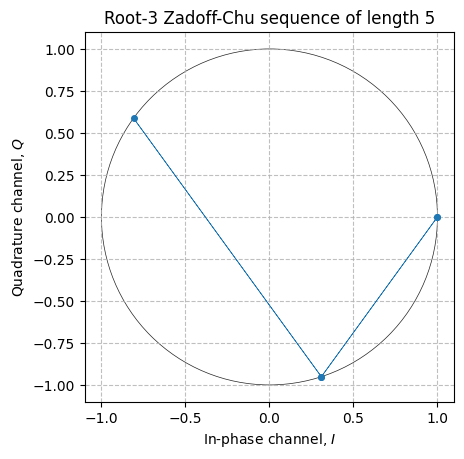

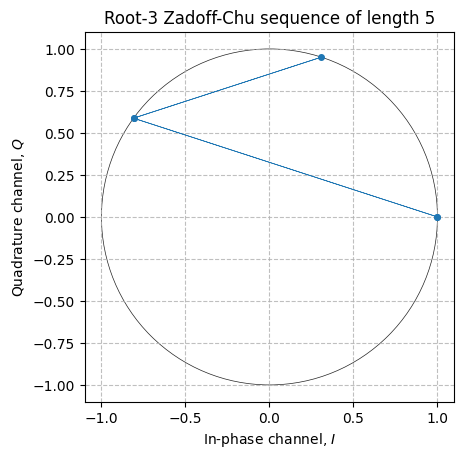

,ZC1 squence,ZC2 squence
0,1.0000+0.0000j,1.0000+0.0000j
1,0.3090-0.9511j,-0.8090+0.5878j
2,-0.8090+0.5878j,0.3090+0.9511j
3,0.3090-0.9511j,-0.8090+0.5878j
4,1.0000+0.0000j,1.0000+0.0000j


In [79]:
# Params: N - length, r1 - root index of ZC sequence
N = 5
r1 = 1
r2 = 3

ZC1 = sdr.zadoff_chu_sequence(N, r1)
ZC2 = sdr.zadoff_chu_sequence(N, r2)

plt.figure()
sdr.plot.constellation(ZC1, linestyle="-", linewidth=0.5, markersize=8)
circle = plt.Circle((0, 0), 1, color='#222222', linewidth=0.5, fill=False)
plt.gca().add_artist(circle)
plt.title(f"Root-{r2} Zadoff-Chu sequence of length {N}")

plt.figure()
sdr.plot.constellation(ZC2, linestyle="-", linewidth=0.5, markersize=8)
circle = plt.Circle((0, 0), 1, color='#222222', linewidth=0.5, fill=False)
plt.gca().add_artist(circle)
plt.title(f"Root-{r2} Zadoff-Chu sequence of length {N}")

# Print sequences
plt.show()

# Print sequences
pd.DataFrame({
    'ZC1 squence':  np.round(ZC1, decimals=4),
    'ZC2 squence':  np.round(ZC2, decimals=4)
})

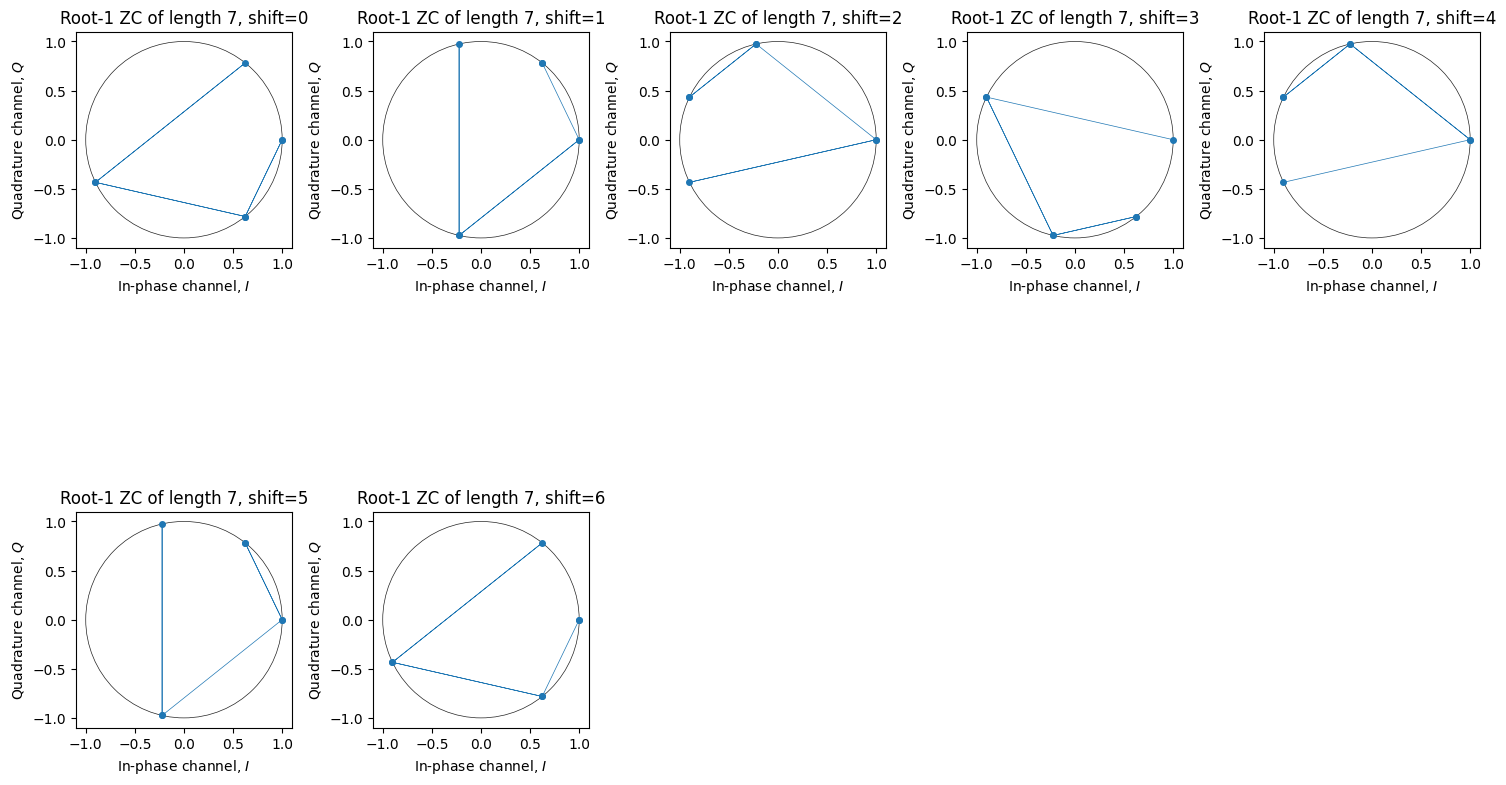

,shift=0,shift=1,shift=2,shift=3,shift=4,shift=5,shift=6
0,1.0000+0.0000j,1.0000+0.0000j,1.0000+0.0000j,1.0000+0.0000j,1.0000+0.0000j,1.0000+0.0000j,1.0000+0.0000j
1,0.6235-0.7818j,-0.2225-0.9749j,-0.9010-0.4339j,-0.9010+0.4339j,-0.2225+0.9749j,0.6235+0.7818j,1.0000+0.0000j
2,-0.9010-0.4339j,-0.2225+0.9749j,1.0000+0.0000j,-0.2225-0.9749j,-0.9010+0.4339j,0.6235+0.7818j,0.6235-0.7818j
3,0.6235+0.7818j,-0.2225-0.9749j,-0.2225+0.9749j,0.6235-0.7818j,-0.9010+0.4339j,1.0000+0.0000j,-0.9010-0.4339j
4,-0.9010-0.4339j,1.0000+0.0000j,-0.9010+0.4339j,0.6235-0.7818j,-0.2225+0.9749j,-0.2225-0.9749j,0.6235+0.7818j
5,0.6235-0.7818j,0.6235+0.7818j,-0.9010+0.4339j,-0.2225-0.9749j,1.0000+0.0000j,-0.2225+0.9749j,-0.9010-0.4339j
6,1.0000+0.0000j,0.6235+0.7818j,-0.2225+0.9749j,-0.9010+0.4339j,-0.9010-0.4339j,-0.2225-0.9749j,0.6235-0.7818j


In [100]:
import pandas as pd

# Cyclic shift of ZC sequence
# Params: N - length, r - root index of ZC sequence
N = 7
r = 1
num_columns = 5

dataframes = {}
plt.figure(figsize=(15, 10))  # Создать фигуру для графиков
num_plots = N

for i in range(N):
    ZC = sdr.zadoff_chu_sequence(N, r, shift=i)
    dataframes[f'shift={i}'] = np.round(ZC, decimals=4)
    
    # Создать подграфик
    plt.subplot(N // num_columns + (N % num_columns > 0), num_columns, i+1)
    sdr.plot.constellation(ZC, linestyle="-", linewidth=0.5, markersize=8)
    circle = plt.Circle((0, 0), 1, color='#222222', linewidth=0.5, fill=False)
    plt.gca().add_artist(circle)
    plt.title(f"Root-{r} ZC of length {N}, shift={i}")

# Увеличить размер подграфиков
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Показать графики
plt.tight_layout()
plt.show()

# Вывести DataFrame
pd.DataFrame(dataframes)


Text(0.5, 1.0, 'Periodic autocorrelation of root-3 Zadoff-Chu sequence of length 5')

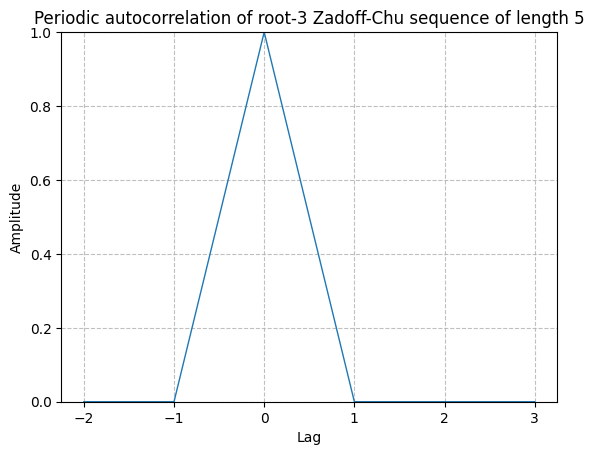

In [73]:
# Params: N - length, r1 - root index of ZC sequence
N = 5
r1 = 3

ZC2 = sdr.zadoff_chu_sequence(N, r1)

# Perform periodic cross correlation
corr = np.correlate(np.roll(np.tile(ZC1, 2), -N//2), ZC1, mode="valid")
lag = np.arange(-N//2 + 1, N//2 + 2)

plt.figure();
sdr.plot.time_domain(lag, np.abs(corr) / N)
plt.ylim(0, 1)
plt.xlabel("Lag")
plt.title(f'Periodic autocorrelation of root-{r1} Zadoff-Chu sequence of length {N}')

Text(0.5, 1.0, 'Periodic cross correlation of root-3 and root-5 Zadoff-Chu sequences of length 8')

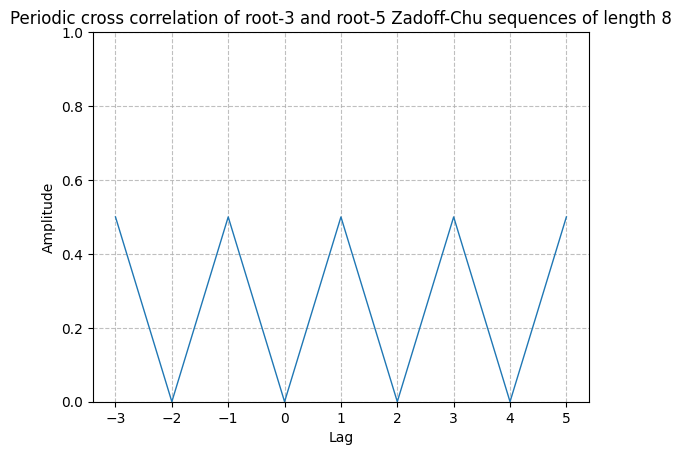

In [105]:
# Params: N - length, r1 - root index of ZC sequence
N = 8
r1 = 5
r2 = 3

ZC1 = sdr.zadoff_chu_sequence(N, r1)
ZC2 = sdr.zadoff_chu_sequence(N, r2)

xcorr = np.correlate(np.roll(np.tile(ZC1, 2), -N//2), ZC2, mode="valid")
lag = np.arange(-N//2 + 1, N//2 + 2)

plt.figure()
sdr.plot.time_domain(lag, np.abs(xcorr) / N)
plt.ylim(0, 1)
plt.xlabel("Lag")
plt.title(f"Periodic cross correlation of root-3 and root-5 Zadoff-Chu sequences of length {N}")